In [1]:
# !pip3 install pandas
# !pip3 install xarray
# !pip3 install netCDF4
# !pip3 install gdal
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import xarray as xr
import netCDF4

from sklearn import tree, preprocessing
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split

In [2]:
cnx = sqlite3.connect('FPA_FOD_20170508.sqlite')

In [3]:
ds = xr.open_dataset('/home/vikram/Documents/code/wildfires/soil_moisture_data_1/ftp.bou.class.noaa.gov/3365939045/001/NPR_SMOPS_CMAP_D20170316.nc')
nc = netCDF4.Dataset('/home/vikram/Documents/code/wildfires/soil_moisture_data_1/ftp.bou.class.noaa.gov/3365939045/001/NPR_SMOPS_CMAP_D20170316.nc')

In [4]:
nc.variables['NRT_SMOS_SM'].add_offset

0.0

In [5]:
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Satellite: ESA's SMOS, EUMETSAT's MetOp-A and MetOp-B, and JAXA's GCOM-W1
    Instrument: MIRAS on SMOS, ASCAT on MetOp-A, ASCAT on MetOp-B, and AMSR2 on GCOM-W1
    Projection: Plate Carree (Equirectangular Projection)
    Latitude_at_Lower_Left_Corner: -90.0
    Longitude_at_Lower_Left_Corner: -180.0
    Latitude_at_Upper_Right_Corner: 90.0
    Longitude_at_Upper_Right_Corner: 180.0
    Product_Resolution: 0.25 degree
    Date_Start: 20170316
    Date_End: 20170316
    Time_Start: 00:00 UTC
    Time_End: 23:59 UTC
    Byte_Order: Big endian
    Product_Version_Number: 2.0
    Data_Compression_Type: No Compression
    Production_Location: NOAA/NESDIS/OSPO at Camp Springs, Maryland, USA
    Contact_Information: Science Lead  : Xiwu Zhan,  NOAA/NESDIS/STAR, xiwu.zhan@noaa.gov
      Operation Lead: Limin Zhao, NOAA/NESDIS/OSPO, limin.zhao@noaa.gov
    dimensions(sizes): Longitude(1440), L

In [6]:

soil_df = ds.to_dataframe()
soil_df.head()

Blended_SM  NRT_SMOS_SM  SMOS_SM  ASCAT_A_SM  ASCAT_B_SM  \
Latitude Longitude                                                             
0        0             -0.0999      -0.0999  -0.0999     -0.0999     -0.0999   
         1             -0.0999      -0.0999  -0.0999     -0.0999     -0.0999   
         2             -0.0999      -0.0999  -0.0999     -0.0999     -0.0999   
         3             -0.0999      -0.0999  -0.0999     -0.0999     -0.0999   
         4             -0.0999      -0.0999  -0.0999     -0.0999     -0.0999   

                    AMSR2_SM  Spare_SM1  Blended_hour  Blended_minute  \
Latitude Longitude                                                      
0        0           -0.0999       -999           -99             -99   
         1           -0.0999       -999           -99             -99   
         2           -0.0999       -999           -99             -99   
         3           -0.0999       -999           -99             -99   
         4           -0.0999       -999           -99             -99   

                    NRT_SMOS_hour    ...      AMSR2_minute  Spare1_hour  \
Latitude Longitude                   ...                                  
0        0                    -99    ...               -99          -99   
         1                    -99    ...               -99          -99   
         2                    -99    ...               -99          -99   
         3                    -99    ...               -99          -99   
         4                    -99    ...               -99          -99   

                    Spare1_minute  Blended_QA  NSMOS_QA  SMOS_QA  ASCAT_A_QA  \
Latitude Longitude                                                             
0        0                    -99        -999      -999     -999        -999   
         1                    -99        -999      -999     -999        -999   
         2                    -99        -999      -999     -999        -999   
         3                    -99        -999      -999     -999        -999   
         4                    -99        -999      -999     -999        -999   

                    ASCAT_B_QA  AMSR2_QA  Spare1_QA  
Latitude Longitude                                   
0        0                -999      -999       -999  
         1                -999      -999       -999  
         2                -999      -999       -999  
         3                -999      -999       -999  
         4                -999      -999       -999  

[5 rows x 28 columns]

In [67]:
c_soildf = soil_df[soil_df['Blended_SM'] != -0.0999]

Blended_SM  NRT_SMOS_SM  SMOS_SM  ASCAT_A_SM  ASCAT_B_SM  \
Latitude Longitude                                                             
39       377            0.2352      -0.0999  -0.0999      0.4060     -0.0999   
         380            0.2671      -0.0999  -0.0999     -0.0999      0.3090   
         497            1.0000      -0.0999  -0.0999      1.0000     -0.0999   
         806            1.0000      -0.0999  -0.0999     -0.0999      1.0000   
         811            0.3851      -0.0999  -0.0999     -0.0999      0.8860   

                    AMSR2_SM  Spare_SM1  Blended_hour  Blended_minute  \
Latitude Longitude                                                      
39       377         -0.0999       -999             2              28   
         380         -0.0999       -999             1              41   
         497         -0.0999       -999             0              46   
         806         -0.0999       -999            18              35   
         811         -0.0999       -999             8              32   

                    NRT_SMOS_hour    ...      AMSR2_minute  Spare1_hour  \
Latitude Longitude                   ...                                  
39       377                  -99    ...               -99          -99   
         380                  -99    ...               -99          -99   
         497                  -99    ...               -99          -99   
         806                  -99    ...               -99          -99   
         811                  -99    ...               -99          -99   

                    Spare1_minute  Blended_QA  NSMOS_QA  SMOS_QA  ASCAT_A_QA  \
Latitude Longitude                                                             
39       377                  -99       25605      -999     -999       25605   
         380                  -99       25605      -999     -999        -999   
         497                  -99       25603      -999     -999       25603   
         806                  -99       25604      -999     -999        -999   
         811                  -99       25603      -999     -999        -999   

                    ASCAT_B_QA  AMSR2_QA  Spare1_QA  
Latitude Longitude                                   
39       377              -999      -999       -999  
         380             25605      -999       -999  
         497              -999      -999       -999  
         806             25604      -999       -999  
         811             25603      -999       -999  

[5 rows x 28 columns]

In [75]:
c_soildf['y']

Latitude  Longitude
39        377           39
          380           39
          497           39
          806           39
          811           39
          814           39
40        320           40
          321           40
          322           40
          323           40
          324           40
          377           40
          380           40
          381           40
          460           40
          493           40
          494           40
          495           40
          496           40
          497           40
          498           40
          603           40
          604           40
          782           40
          784           40
          785           40
          786           40
          787           40
          788           40
          789           40
                      ... 
574       443          574
          444          574
          445          574
          446          574
          447          574
575     

In [72]:
c_soildf['x'] = c_soildf.index.get_level_values(1)
c_soildf['y'] = c_soildf.index.get_level_values(0)

/home/vikram/.virtualenvs/pw/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/vikram/.virtualenvs/pw/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
def convLat(row):
    y = (((row.name[0] * 1.0) + 90.0) * (720 / 180.0))
    return y

In [20]:
def convLong(row):
    x = ((row.name[1] + 180.0) * (1440 / 360.0))
    return x

In [28]:
def getValLat(row):
    return row.name[0]

In [29]:
def getValLong(row):
    return row.name[1]

(39, 377)

In [84]:
df = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE FROM 'Fires'", cnx)
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   FIRE_SIZE       DATE  
0       0.10 2005-02-02  
1       0.25 2004-05-12  
2       0.10 2004-05-31  
3       0.10 2004-06-28  
4       0.10 2004-06-28  


In [85]:
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
df['DAY_OF_WEEK'] = df['DATE'].dt.weekday_name
df_orig = df.copy()
print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   FIRE_SIZE       DATE  MONTH DAY_OF_WEEK  
0       0.10 2005-02-02      2   Wednesday  
1       0.25 2004-05-12      5   Wednesday  
2       0.10 2004-05-31      5      Monday  
3       0.10 2004-06-28      6      Monday  
4       0.10 2004-06-28      6      Monday  


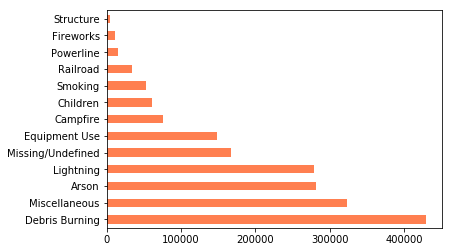

In [23]:
df['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='coral')
#plt.show()
pylab.savefig('causes.png')

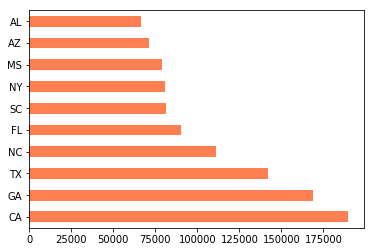

In [11]:
df['STATE'].value_counts().head(n=10).plot(kind='barh',color='coral')
pylab.savefig('state.png')

In [12]:
#le = preprocessing.LabelEncoder()
#df['STAT_CAUSE_DESCR'] = le.fit_transform(df['STAT_CAUSE_DESCR'])
#df['STATE'] = le.fit_transform(df['STATE'])
#df['DAY_OF_WEEK'] = le.fit_transform(df['DAY_OF_WEEK'])

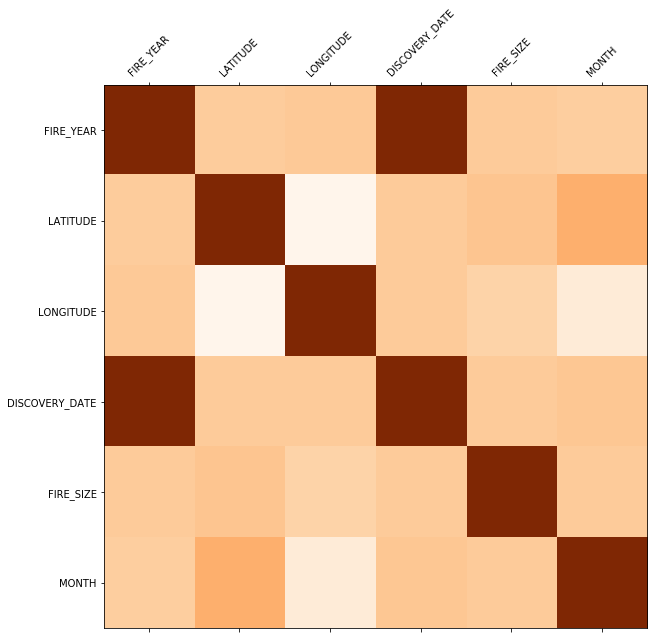

In [13]:
def plot_corr(df,size=10):
    corr = df.corr()  #the default method is pearson
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    pylab.savefig('matrix.png')
plot_corr(df)


In [24]:
df.isnull().any() #Checks for null values

FIRE_YEAR           False
STAT_CAUSE_DESCR    False
LATITUDE            False
LONGITUDE           False
STATE               False
DISCOVERY_DATE      False
FIRE_SIZE           False
DATE                False
MONTH               False
DAY_OF_WEEK         False
dtype: bool

In [96]:
# Find number of wildfires from 03-12-2016 to 03-12-2018
df['FIRE_YEAR'] = df['FIRE_YEAR'].astype(int)


In [97]:
recent_df = df[df['FIRE_YEAR'] > 2003]
len(df[df['FIRE_YEAR'] > 2016])

0

In [106]:
len(df[(df['FIRE_YEAR'] > 2014)])

74491

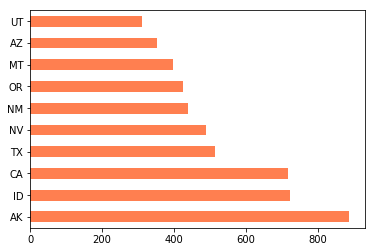

In [26]:
recent_df['STATE'].value_counts().head(n=10).plot(kind='barh',color='coral')

In [76]:
recent_df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,DATE,MONTH,DAY_OF_WEEK
16,2004,Equipment Use,38.523333,-120.211667,CA,2453284.5,16823.0,2004-10-06,10,Wednesday
17,2004,Equipment Use,38.780000,-120.260000,CA,2453291.5,7700.0,2004-10-13,10,Wednesday
188,2005,Lightning,33.723333,-111.275000,AZ,2453542.5,16100.0,2005-06-21,6,Tuesday
591,2005,Lightning,33.551111,-111.106667,AZ,2453570.5,2093.0,2005-07-19,7,Tuesday
1505,2005,Lightning,33.613333,-108.558889,NM,2453519.5,11936.0,2005-05-29,5,Sunday


In [38]:
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)

In [39]:
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left)
		split(node['left'], max_depth, min_size, depth+1)
	# process right child
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right)
		split(node['right'], max_depth, min_size, depth+1)

In [1]:
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left)
		split(node['left'], max_depth, min_size, depth+1)
	# process right child
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right)
		split(node['right'], max_depth, min_size, depth+1)

SyntaxError: invalid syntax (<ipython-input-2-26e5fa8a5c12>, line 1)

In [41]:
def build_tree(train, max_depth, min_size):
	root = get_split(train)
	split(root, max_depth, min_size, 1)
	return root

In [42]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right

# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini

# Select the best split point for a dataset
def get_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	for index in range(len(dataset[0])-1):
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Create a terminal node value
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)

# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left)
		split(node['left'], max_depth, min_size, depth+1)
	# process right child
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right)
		split(node['right'], max_depth, min_size, depth+1)

# Build a decision tree
def build_tree(train, max_depth, min_size):
	root = get_split(train)
	split(root, max_depth, min_size, 1)
	return root

# Print a decision tree
def print_tree(node, depth=0):
	if isinstance(node, dict):
		print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
		print_tree(node['left'], depth+1)
		print_tree(node['right'], depth+1)
	else:
		print('%s[%s]' % ((depth*' ', node)))

dataset = [[2.771244718,1.784783929,0],
	[1.728571309,1.169761413,0],
	[3.678319846,2.81281357,0],
	[3.961043357,2.61995032,0],
	[2.999208922,2.209014212,0],
	[7.497545867,3.162953546,1],
	[9.00220326,3.339047188,1],
	[7.444542326,0.476683375,1],
	[10.12493903,3.234550982,1],
	[6.642287351,3.319983761,1]]
tree = build_tree(df, 1, 1)
print_tree(tree)

KeyError: 0